# Class 01 Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df_salary = pd.read_csv("./dataset.csv")
df_salary

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0
...,...,...
495,58.0,6259.0
496,34.0,6099.0
497,47.0,6170.0
498,37.0,5064.0


### EDA

In [3]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
df_salary.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [5]:
df_salary.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [6]:
df_salary.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

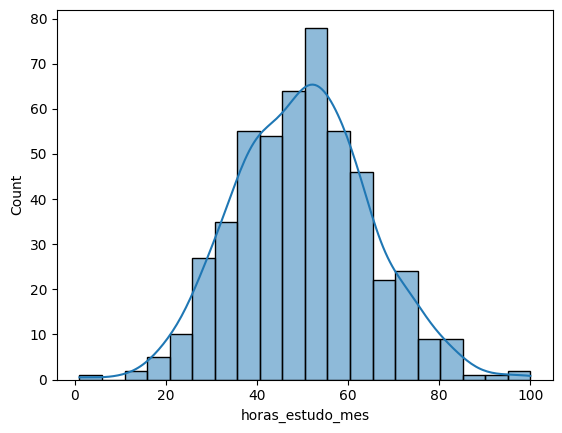

In [7]:
sns.histplot(data=df_salary, x="horas_estudo_mes", kde=True)

### Data Preparation

In [8]:
x = np.array(df_salary["horas_estudo_mes"])
y = np.array(df_salary["salario"])

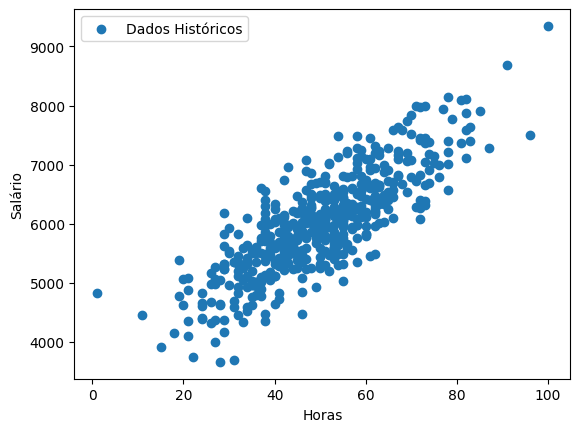

In [9]:
plt.scatter(x, y, label="Dados Históricos")
plt.xlabel("Horas")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [10]:
x = x.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
x_train.shape

(400, 1)

In [12]:
x_test.shape

(100, 1)

In [13]:
y_train.shape

(400,)

In [14]:
y_test.shape

(100,)

### Pedictive Modeling

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

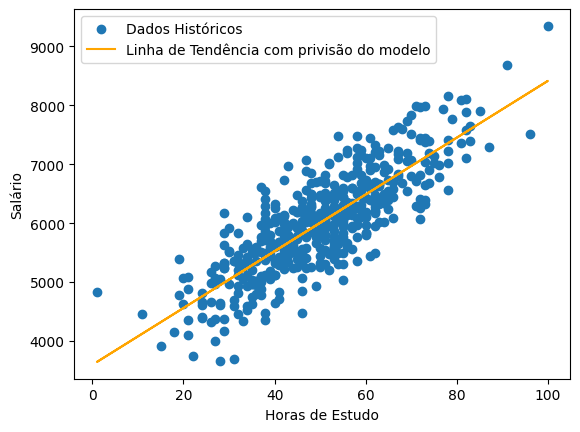

In [16]:
plt.scatter(x, y, label="Dados Históricos")
plt.plot(x, model.predict(x), label="Linha de Tendência com privisão do modelo", color="orange")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()


In [17]:
score = model.score(x_test, y_test)
print(f"O coeficiente R² = {score:.2f}")

O coeficiente R² = 0.59


### Deploy

In [18]:
hours = np.array([[60]])
predict_salary = model.predict(hours)
predict_salary[0]

6487.694890658935

In [19]:
# y = ax + b

a = model.coef_[0]
b = model.intercept_

hours = 73
y = a * hours + b
print(f"A previsão para {hours}h é de R$ {y:.2f}")

A previsão para 73h é de R$ 7114.06
